# Prima Indian Diabetes Dataset
Classification accuracy

In [12]:
#read the data into a Pandas DataFrame
import pandas as pd
url = 'data/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp','skin','insulin', 'bmi','pedigree','age','label']
pima = pd.read_csv(url, header = None, names = col_names)

In [13]:
#print the first 5 rows
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Question**  Can we predict the diabetes status of a patient given thier health measurements?

In [14]:
#define X and y
features_col = ['pregnant', 'insulin', 'bmi','age']
X = pima[features_col]
y = pima.label

In [15]:
 #split X and y into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [16]:
#train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


c:\users\rabinson\documents\deeplearningwithpython\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#make class prediction for the testing set
y_pred_class = logreg.predict(X_test)

In [18]:
#calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.6927083333333334


In [19]:
#examine the class distribution of the testing set (using a pandaas series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [20]:
#calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [21]:
#calculate the percentage of zeros
1-y_test.mean()

0.6770833333333333

In [24]:
#calculate null accuracy (for binary classification problem coded as 0/1)
max(y_test.mean(), 1-y_test.mean())

0.6770833333333333

In [25]:
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

#### Comparing the true and predicted reponses

In [26]:
#print the first 25 true and predicted responses
print('True: ', y_test.values[0:25])
print('Pred: ', y_pred_class[0:25])

True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Confusion Matrix

In [27]:
#IMPORTANT : first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [29]:
#save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test,y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

### Metrics computed from a confusion matrix

**Classification Accuracy** : Overall, how oftenis the classifier correct?


In [30]:
print((TP+TN)/float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


**Classification Error:** Overall, how often is the incorrect?

In [35]:
print((FP + FN)/float(TP + TN+FP+FN))
print (1- metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


**Sensitiviy** When the acutal value is positive, how often is the prediction correct?

In [37]:
print(TP/float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


**Specificity** When the actual vallue is negative, how often is the prediction correct?

In [38]:
print(TN/ float(TN+FP))

0.9076923076923077


**False Positive** When the actual value is negative, how often is the prediction incorrect?

In [39]:
print(FP/float(TN+FP))

0.09230769230769231


**Precision** When a positive value is predicted, how often is the prediction correct?


In [40]:
print(TP/float(TP+FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


### Adjusting the classification threshold

In [41]:
#print the first 10 predicted response
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [42]:
#print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10,:]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [43]:
#print the first 10 predict probabilities of class 1
logreg.predict_proba(X_test)[0:10,1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [46]:
#store the predicted probabilitey for class 1
y_pred_prob = logreg.predict_proba(X_test)[: ,1]

In [47]:
#allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'Frequency')

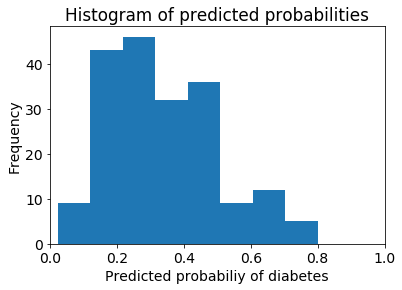

In [48]:
#histogram of predicted probablities
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probabiliy of diabetes')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting diabetes in order to **increas the sensitivity** of the classifier


In [57]:
#predict diabetes if the predicted probability is greater than 0.3
from sklearn import preprocessing as prep
y_pred_class = prep.binarize(y_pred_prob, 0.3)[0]

ValueError: Expected 2D array, got 1D array instead:
array=[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438 0.35755557 0.74087965
 0.36050235 0.23012363 0.42654231 0.19103515 0.45763601 0.1190141
 0.43928953 0.36961151 0.44187989 0.37611662 0.19816022 0.41677304
 0.15548281 0.2531671  0.09743077 0.69633712 0.15358309 0.2197836
 0.43094832 0.34216058 0.22396114 0.38073543 0.13342134 0.38790216
 0.47049703 0.16204743 0.29548176 0.30918161 0.27299705 0.38816583
 0.27353443 0.28881041 0.63471914 0.02365251 0.15820648 0.23018375
 0.3484593  0.27580041 0.33264104 0.24880596 0.74489512 0.39001464
 0.41625545 0.13575687 0.18895376 0.64777682 0.18922131 0.05685904
 0.63991547 0.46636382 0.1250972  0.26957602 0.24919104 0.30570396
 0.46376224 0.20963095 0.42847829 0.40762264 0.20169096 0.27027066
 0.26255856 0.57238263 0.45467041 0.27716152 0.58001281 0.41599488
 0.27276101 0.34099223 0.54626578 0.37930723 0.2992205  0.10059169
 0.32872602 0.45101363 0.16036979 0.4896975  0.63230508 0.40738404
 0.19794397 0.19698021 0.24463208 0.11147185 0.4158597  0.21561856
 0.54124529 0.48803602 0.64652767 0.33940658 0.54263427 0.16213824
 0.3778741  0.11311287 0.34781987 0.34042784 0.1790985  0.21324812
 0.14710946 0.23014102 0.18404592 0.52224649 0.47099366 0.28884248
 0.49325079 0.41744473 0.22915008 0.27022911 0.19243924 0.7498713
 0.46500093 0.6645454  0.42098599 0.53564034 0.16034702 0.1435686
 0.38142426 0.33827314 0.3630065  0.12842531 0.28333693 0.04005558
 0.18481139 0.66716947 0.46352874 0.48715682 0.19910794 0.45861651
 0.23216721 0.18369267 0.26391994 0.37492969 0.12916506 0.41413913
 0.42460858 0.13832191 0.20781694 0.29477699 0.15825099 0.36016234
 0.23741449 0.43350689 0.20619881 0.23162338 0.61111541 0.19731009
 0.80071498 0.17808491 0.36488735 0.78618643 0.44080614 0.36559654
 0.11760138 0.22843325 0.47865069 0.21320525 0.51498521 0.16122494
 0.23740119 0.29374391 0.16670048 0.48716526 0.29969894 0.44651043
 0.50169902 0.29246506 0.61736228 0.41593995 0.25820945 0.1741968
 0.33519541 0.69606825 0.32454368 0.35730426 0.2336947  0.23738524
 0.38409318 0.24691412 0.27954552 0.18501174 0.2622362  0.27856926].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:
#print the first 10 predicted probabilites
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [59]:
#print teh first 10 predicted classes with the lowe threshold
y_pred_class[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [60]:
#previous confusion matrix
print(confusion)

[[118  12]
 [ 47  15]]


In [61]:
#new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test,y_pred_class))

[[118  12]
 [ 47  15]]
